<a href="https://colab.research.google.com/github/Navya2906/FSD-Project/blob/main/Dynamic_pricing_for_urban_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

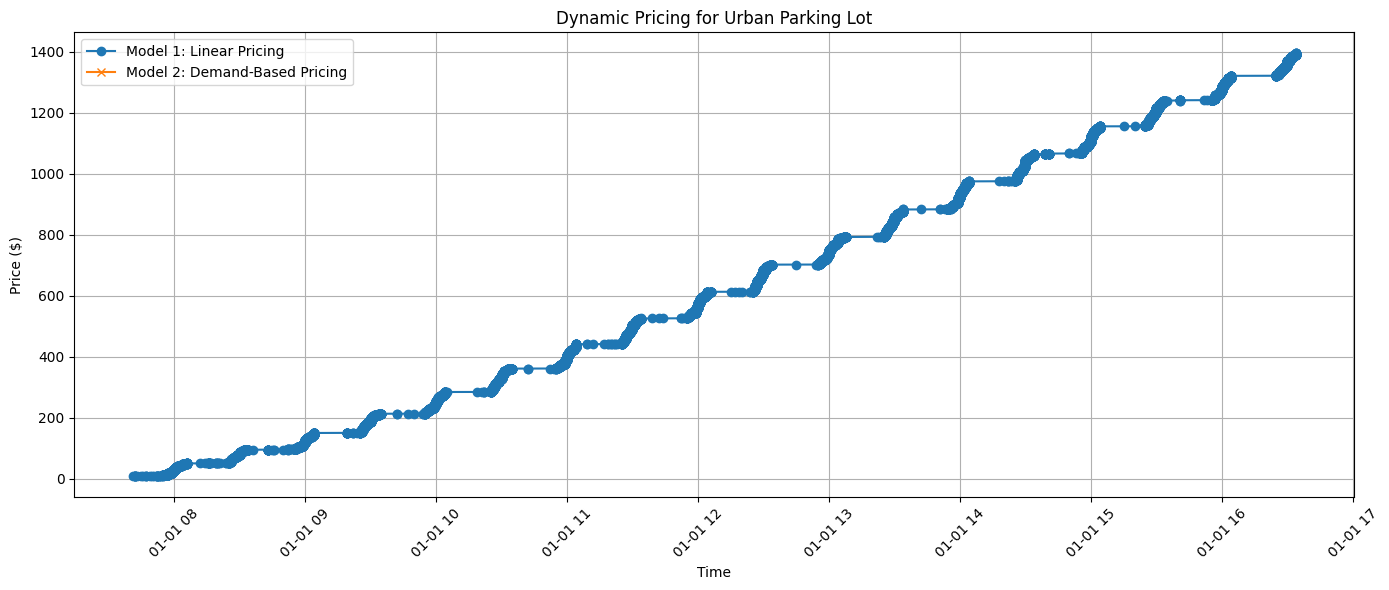

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

# Convert 'LastUpdatedTime' to datetime
data['LastUpdatedTime'] = pd.to_datetime(data['LastUpdatedTime'], format='%H:%M:%S', errors='coerce')

# Sort data by time to simulate real-time updates
data = data.sort_values(by='LastUpdatedTime').reset_index(drop=True)

# Encode TrafficConditionNearby to numerical values
traffic_mapping = {'low': 2, 'medium': 5, 'high': 8}
data['TrafficNumeric'] = data['TrafficConditionNearby'].map(traffic_mapping)

# Encode VehicleType to weights
vehicle_mapping = {'car': 1.0, 'bike': 0.8, 'truck': 1.5}
data['VehicleWeight'] = data['VehicleType'].map(vehicle_mapping)

# Extract necessary features
capacity = data['Capacity'].iloc[0]  # Assuming capacity is constant for the lot
occupancy = data['Occupancy'].values
queue_length = data['QueueLength'].values
traffic = data['TrafficNumeric'].values
is_special_day = data['IsSpecialDay'].values
vehicle_weight = data['VehicleWeight'].values
time_points = data['LastUpdatedTime']

# Base price
base_price = 10

# =========================
# Model 1: Baseline Linear Model
# =========================
alpha = 0.05
prices_model1 = [base_price]
for occ in occupancy[:-1]:
    new_price = prices_model1[-1] + alpha * (occ / capacity)
    prices_model1.append(new_price)

# =========================
# Model 2: Demand-Based Model
# =========================
alpha_demand = 0.4
beta_demand = 0.2
gamma_demand = 0.3
delta_demand = 0.5
epsilon_demand = 0.1
lambda_demand = 0.5

# Calculate demand function
normalized_demand = (alpha_demand * (occupancy / capacity) +
                     beta_demand * queue_length -
                     gamma_demand * traffic +
                     delta_demand * is_special_day +
                     epsilon_demand * vehicle_weight)

# Normalize demand to 0-1 range
normalized_demand = (normalized_demand - np.min(normalized_demand)) / (np.max(normalized_demand) - np.min(normalized_demand))

# Calculate prices for Model 2
prices_model2 = base_price * (1 + lambda_demand * normalized_demand)
prices_model2 = np.clip(prices_model2, 0.5 * base_price, 2 * base_price)

# =========================
# Plotting the Results
# =========================
plt.figure(figsize=(14, 6))
plt.plot(time_points, prices_model1, label='Model 1: Linear Pricing', marker='o')
plt.plot(time_points, prices_model2, label='Model 2: Demand-Based Pricing', marker='x')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Dynamic Pricing for Urban Parking Lot')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# New Section